<a href="https://colab.research.google.com/github/ismachy/Introduction-to-ML/blob/main/HW2_Problem3b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#using a modified version of Dr. Tabkhi's "LinearRegression" code found at: https://github.com/HamedTabkhi/Intro-to-ML/blob/main/IntroCodes/LinearRegression.ipynb
#using a modified version of Dr. Tabkhi's "Pre_Processing" code found at: https://github.com/HamedTabkhi/Intro-to-ML/blob/main/RegressionCode/Pre_Processing.ipynb
#using a modified version of Dr. Tabkhi's "DummyRegressionValidation" code found at: https://github.com/HamedTabkhi/Intro-to-ML/blob/main/RegressionCode/DummyRegressionValidation.ipynb

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url = 'https://raw.githubusercontent.com/hurricane195/Intro-to-Machine-Learning/Datasets/Housing.csv'
#housing = pd.DataFrame(pd.read_csv(file_path))
housing = pd.read_csv(url)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
from IPython.display import display
display(housing)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [ ]:
# List of variables to map

varlist = ['mainroad','guestroom','basement','hotwaterheating','airconditioning', 'prefarea']
#furnishingList = ['furnishingstatus']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

"""
# Defining the map function
def furnishing_map(x):
    return x.map({'furnished': 2, 'semi-furnished': 1, 'unfurnished': 0})
"""

housing[varlist] = housing[varlist].apply(binary_map)
#housing[furnishingList] = housing[furnishingList].apply(furnishing_map)

housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [ ]:
# Separate features and labels

#Area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking, prefarea

X1 = housing.values[:,1]  # get AREA input values from the second column
X2 = housing.values[:,2]  # get BEDROOM input values from the third column
X3 = housing.values[:,3]  # get BATHROOM input values from the fourth column
X4 = housing.values[:,4]  # get STORIES input values from the fith column

X5 = housing.values[:,5]  # get MAINROAD input values from the sixth column
X6 = housing.values[:,6]  # get GUESTROOM input values from the seventh column
X7 = housing.values[:,7]  # get BASEMENT input values from the eight column
X8 = housing.values[:,8]  # get HOTWATERHEATING input values from the ninth column
X9 = housing.values[:,9]  # get AIRCONDITIONING input values from the tenth column
X10 = housing.values[:,10]  # get PARKING input values from the eleventh column
X11 = housing.values[:,11]  # get PREFAREA input values from the eleventh column

y = housing.values[:,0]  # get output values from fourth column -- Y is the list here
m = len(y)  # Number of training examples

# Display first 13 records and the total number of training examples
print('X1 = ', X1[: 5])
print('X2 = ', X2[: 5])
print('X3 = ', X3[: 5])
print('X4 = ', X4[: 5])
print('X5 = ', X5[: 5])

print('X6 = ', X6[: 5])
print('X7 = ', X7[: 5])
print('X8 = ', X8[: 5])
print('X9 = ', X9[: 5])
print('X10 = ', X10[: 5])
print('X11 = ', X11[: 5])

print('y = ', y[: 5])
print('m = ', m)



X1 =  [7420 8960 9960 7500 7420]
X2 =  [4 4 3 4 4]
X3 =  [2 4 2 2 1]
X4 =  [3 4 2 2 2]
X5 =  [1 1 1 1 1]
X6 =  [0 0 0 0 1]
X7 =  [0 0 1 1 1]
X8 =  [0 0 0 0 0]
X9 =  [1 1 0 1 1]
X10 =  [2 3 2 3 2]
X11 =  [1 0 1 1 0]
y =  [13300000 12250000 12250000 12215000 11410000]
m =  545


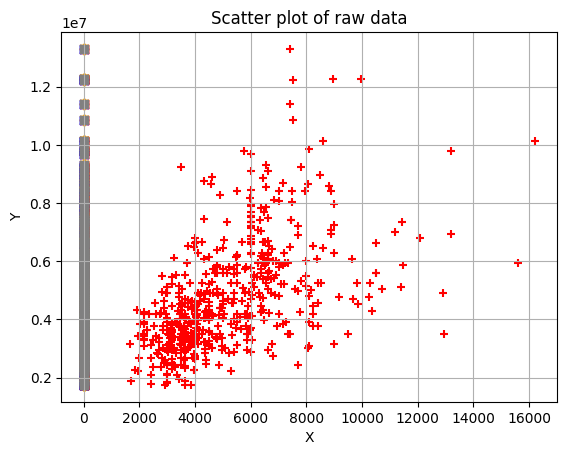

In [ ]:
# Scatter plot
plt.scatter(X1, y, color='red', marker='+')
plt.scatter(X2, y, color='blue', marker='x')
plt.scatter(X3, y, color='purple', marker='*')
plt.scatter(X4, y, color='orange', marker='o')
plt.scatter(X5, y, color='gray', marker='.')

plt.scatter(X5, y, color='red', marker='<')
plt.scatter(X6, y, color='blue', marker='>')
plt.scatter(X7, y, color='purple', marker='^')
plt.scatter(X8, y, color='orange', marker='d')
plt.scatter(X9, y, color='gray', marker='p')
plt.scatter(X10, y, color='orange', marker='v')
plt.scatter(X11, y, color='gray', marker='s')

# Grid, labels, and title
plt.grid(True)
plt.rcParams["figure.figsize"] = (6, 6)
plt.xlabel('X')

plt.ylabel('Y')
plt.title('Scatter plot of raw data')

# Show the plot
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.8, test_size = 0.2, random_state = 100)

df_train.shape

(436, 13)

In [ ]:
df_test.shape

(109, 13)

In [ ]:
#df_train.head()

In [ ]:

from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
#scaler = StandardScaler()

#area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad','guestroom','basement', 'hotwaterheating', 'airconditioning','parking', 'prefarea']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])


df_newTrain=df_train[num_vars]
df_newTrain.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
22,0.596970,0.432609,0.4,0.000000,0.000000,1.0,1.0,1.0,0.0,1.0,0.333333,0.0
41,0.527273,0.314954,0.4,0.333333,1.000000,1.0,0.0,0.0,0.0,1.0,0.000000,1.0
91,0.404242,0.342105,0.2,0.000000,0.000000,1.0,1.0,1.0,0.0,0.0,0.666667,1.0
118,0.363636,0.319131,0.4,0.000000,0.000000,1.0,0.0,1.0,0.0,1.0,0.000000,1.0
472,0.109091,0.124896,0.6,0.000000,0.333333,1.0,0.0,0.0,0.0,0.0,1.000000,0.0


In [ ]:
df_newTrain.shape

(436, 12)

In [ ]:
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

df_newTest=df_test[num_vars]
df_newTest.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
265,0.248485,0.088172,0.333333,0.0,0.333333,1.0,0.0,0.0,0.0,0.0,0.000000,1.0
54,0.531987,0.311828,0.333333,0.5,0.333333,1.0,1.0,0.0,0.0,1.0,0.333333,0.0
171,0.329966,0.617849,0.333333,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.333333,1.0
244,0.262626,0.263082,0.333333,0.0,0.333333,1.0,1.0,1.0,0.0,0.0,0.000000,1.0
268,0.246465,0.236559,0.666667,0.0,0.333333,1.0,0.0,0.0,0.0,1.0,0.000000,0.0


In [ ]:
df_newTest.shape

(109, 12)

In [ ]:
y_newTrain = df_newTrain.pop('price')
y_newTest=df_newTest.pop('price')

In [ ]:
y_newTrain.head()

22     0.596970
41     0.527273
91     0.404242
118    0.363636
472    0.109091
Name: price, dtype: float64

In [ ]:
y_newTest.head()

265    0.248485
54     0.531987
171    0.329966
244    0.262626
268    0.246465
Name: price, dtype: float64

In [ ]:
X_newTrain = df_newTrain
X_newTest = df_newTest

In [ ]:
X_newTrain.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
22,0.432609,0.4,0.000000,0.000000,1.0,1.0,1.0,0.0,1.0,0.333333,0.0
41,0.314954,0.4,0.333333,1.000000,1.0,0.0,0.0,0.0,1.0,0.000000,1.0
91,0.342105,0.2,0.000000,0.000000,1.0,1.0,1.0,0.0,0.0,0.666667,1.0
118,0.319131,0.4,0.000000,0.000000,1.0,0.0,1.0,0.0,1.0,0.000000,1.0
472,0.124896,0.6,0.000000,0.333333,1.0,0.0,0.0,0.0,0.0,1.000000,0.0


In [ ]:
X_newTest.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
265,0.088172,0.333333,0.0,0.333333,1.0,0.0,0.0,0.0,0.0,0.000000,1.0
54,0.311828,0.333333,0.5,0.333333,1.0,1.0,0.0,0.0,1.0,0.333333,0.0
171,0.617849,0.333333,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.333333,1.0
244,0.263082,0.333333,0.0,0.333333,1.0,1.0,1.0,0.0,0.0,0.000000,1.0
268,0.236559,0.666667,0.0,0.333333,1.0,0.0,0.0,0.0,1.0,0.000000,0.0


In [ ]:
#We walk through the initial steps of building a linear regression model from scratch using NumPy. Let's break down what you're doing:
#X_0 = np.ones((m, 1)): We're creating a column vector of ones. This will be used as the "bias" term for the linear regression model.
#X_1 = X.reshape(m, 1): You're reshaping features (X) to make it a 2D array suitable for matrix operations.
#X = np.hstack((X_0, X_1)): We're horizontally stacking X_0 and X_1 to create final feature matrix X.

In [ ]:
X_0_train = np.ones((len(X_newTrain), 1))
X_0_train[:5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [ ]:
"""
X_newTrain = X_newTrain.reshape(len(X_newTrain), 1)
X_newTrain[:10]
"""

'\nX_newTrain = X_newTrain.reshape(len(X_newTrain), 1)\nX_newTrain[:10]\n'

In [ ]:
# Lets use hstack() function from numpy to stack X_0 and X_1 horizontally (i.e. column
# This will be our final X matrix (feature matrix)
xTrain = np.hstack((X_0_train, X_newTrain))
xTrain[:5]

array([[1.        , 0.4326093 , 0.4       , 0.        , 0.        ,
        1.        , 1.        , 1.        , 0.        , 1.        ,
        0.33333333, 0.        ],
       [1.        , 0.31495405, 0.4       , 0.33333333, 1.        ,
        1.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 1.        ],
       [1.        , 0.34210526, 0.2       , 0.        , 0.        ,
        1.        , 1.        , 1.        , 0.        , 0.        ,
        0.66666667, 1.        ],
       [1.        , 0.31913116, 0.4       , 0.        , 0.        ,
        1.        , 0.        , 1.        , 0.        , 1.        ,
        0.        , 1.        ],
       [1.        , 0.12489557, 0.6       , 0.        , 0.33333333,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        ]])

In [ ]:
X_0_test = np.ones((len(X_newTest), 1))
X_0_test[:5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [ ]:
# Lets use hstack() function from numpy to stack X_0 and X_1 horizontally (i.e. column
# This will be our final X matrix (feature matrix)
xTest = np.hstack((X_0_test, X_newTest))
xTest[:5]

array([[1.        , 0.08817204, 0.33333333, 0.        , 0.33333333,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        ],
       [1.        , 0.31182796, 0.33333333, 0.5       , 0.33333333,
        1.        , 1.        , 0.        , 0.        , 1.        ,
        0.33333333, 0.        ],
       [1.        , 0.61784946, 0.33333333, 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.33333333, 1.        ],
       [1.        , 0.26308244, 0.33333333, 0.        , 0.33333333,
        1.        , 1.        , 1.        , 0.        , 0.        ,
        0.        , 1.        ],
       [1.        , 0.23655914, 0.66666667, 0.        , 0.33333333,
        1.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        ]])

In [ ]:
theta = np.zeros(12)
theta

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
def compute_cost(xTrain, y_newTrain, theta):
    """
    Compute cost for linear regression.

    Parameters:
    X : 2D array where each row represents the training example and each column represent the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)

    Returns:
    J : Scalar value, the cost
    """
    predictions = xTrain.dot(theta)
    errors = np.subtract(predictions, y_newTrain)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

In [ ]:
# Lets compute the cost for theta values
cost = compute_cost(xTrain, y_newTrain, theta)
print('The cost for given values of theta_0 through theta_10 =', cost)

The cost for given values of theta_0 through theta_10 = 0.03824530285048989


In [ ]:
def compute_cost(xTest, y_newTest, theta):
    """
    Compute cost for linear regression.

    Parameters:
    X : 2D array where each row represents the training example and each column represent the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)

    Returns:
    J : Scalar value, the cost
    """
    predictions = xTest.dot(theta)
    errors = np.subtract(predictions, y_newTest)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

In [ ]:
# Lets compute the cost for theta values
cost = compute_cost(xTest, y_newTest, theta)
print('The cost for given values of theta_0 through theta_5 =', cost)

The cost for given values of theta_0 through theta_5 = 0.010681967587197253


In [ ]:
def gradient_descent(xTrain, y_newTrain, theta, alpha, iterations, lambdaValue):
    """
    Compute the optimal parameters using gradient descent for linear regression.

    Parameters:
    X : 2D array where each row represents the training example and each column represents the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)
    alpha : Learning rate (scalar)
    iterations : Number of iterations (scalar)

    Returns:
    theta : Updated values of fitting parameters or weights after 'iterations' iterations. Dimension (n)
    cost_history : Array containing the cost for each iteration. Dimension (iterations)
    """

    m = len(y)  # Number of training examples
    cost_history = np.zeros(iterations)
    test_cost_history = np.zeros(iterations)

    for i in range(iterations):
        predictions = xTrain.dot(theta)
        errors = np.subtract(predictions, y_newTrain)
        sum_delta = (alpha / len(X_newTrain)) * xTrain.transpose().dot(errors)
        sum_reg = (lambdaValue/len(X_newTrain))*sum(theta)
        #theta -= sum_delta - sum_reg
        theta = theta - sum_delta - sum_reg
        cost_history[i] = compute_cost(xTrain, y_newTrain, theta)
        test_cost_history[i] = compute_cost(xTest, y_newTest, theta)

    return theta, cost_history, test_cost_history

In [ ]:
theta = [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]
iterations = 1500
alpha = 0.1
lambdaValue = 10;

In [ ]:
theta, cost_history, test_cost_history= gradient_descent(xTrain, y_newTrain, theta, alpha, iterations, lambdaValue)
print('Final value of theta =', theta)
print('cost_history =', cost_history)

Final value of theta = [ 0.17475582 -0.12510852 -0.13426404 -0.02048267  0.08800335  0.11361619
 -0.00021958  0.01975479 -0.18302887  0.07665718  0.04363087  0.01530336]
cost_history = [0.02439405 0.01840993 0.01554312 ... 0.01020773 0.01020773 0.01020772]


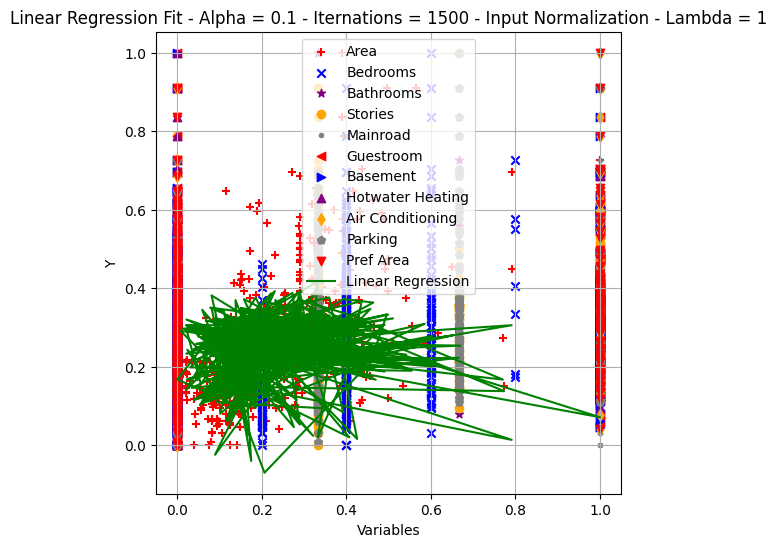

In [ ]:
# Scatter plot
#Area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking, prefarea
plt.scatter(xTrain[:,1], y_newTrain, color='red', marker='+', label='Area')
plt.scatter(xTrain[:,2], y_newTrain, color='blue', marker='x', label='Bedrooms')
plt.scatter(xTrain[:,3], y_newTrain, color='purple', marker='*', label='Bathrooms')
plt.scatter(xTrain[:,4], y_newTrain, color='orange', marker='o', label='Stories')
plt.scatter(xTrain[:,5], y_newTrain, color='gray', marker='.', label='Mainroad')
plt.scatter(xTrain[:,6], y_newTrain, color='red', marker='<', label='Guestroom')
plt.scatter(xTrain[:,7], y_newTrain, color='blue', marker='>', label='Basement')
plt.scatter(xTrain[:,8], y_newTrain, color='purple', marker='^', label='Hotwater Heating')
plt.scatter(xTrain[:,9], y_newTrain, color='orange', marker='d', label='Air Conditioning')
plt.scatter(xTrain[:,10], y_newTrain, color='gray', marker='p', label='Parking')
plt.scatter(xTrain[:,11], y_newTrain, color='red', marker='v', label='Pref Area')


# Line plot for the linear regression model
plt.plot(xTrain[:, 1], xTrain.dot(theta), color='green', label='Linear Regression')

# Plot customizations
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)
plt.xlabel('Variables')
plt.ylabel('Y')
plt.title('Linear Regression Fit - Alpha = 0.1 - Iternations = 1500 - Input Normalization - Lambda = 1')
plt.legend()

# Show the plot
plt.show()

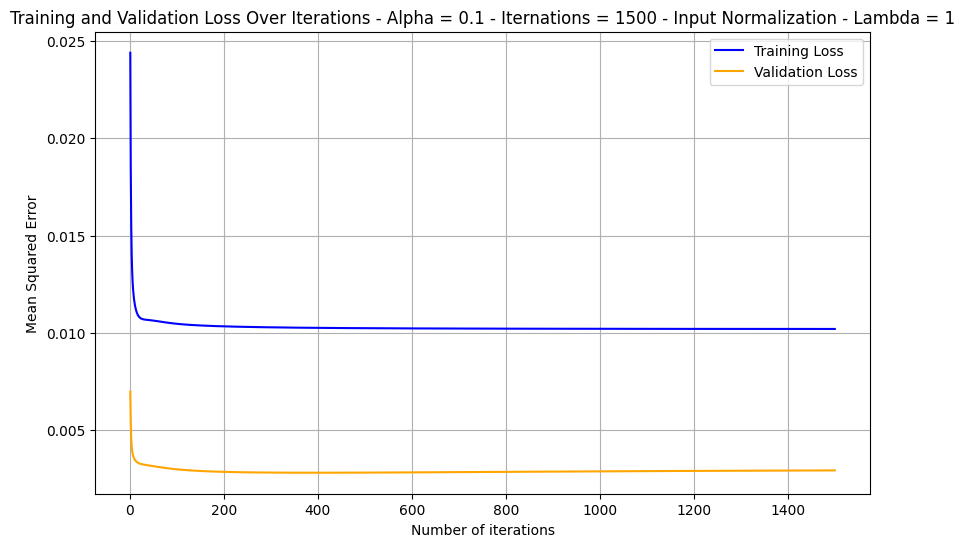

In [ ]:
plt.plot(range(1, iterations + 1), cost_history, color='blue', label= 'Training Loss')
plt.plot(range(1, iterations + 1), test_cost_history, color='orange', label= 'Validation Loss')
plt.legend()
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Mean Squared Error')
plt.title('Training and Validation Loss Over Iterations - Alpha = 0.1 - Iternations = 1500 - Input Normalization - Lambda = 1')

# Show the plot
plt.show()

In [ ]:
#USING SCALAR *********************************************************************************************************************************************************************************

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
#scaler = MinMaxScaler()
scaler = StandardScaler()

#area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad','guestroom','basement', 'hotwaterheating', 'airconditioning','parking', 'prefarea']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])


df_newTrain=df_train[num_vars]
df_newTrain.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
22,2.063847,1.351873,0.078679,-0.579897,-0.929023,0.399468,2.193931,1.353207,-0.241355,1.525859,0.311484,-0.549083
41,1.632233,0.565326,0.078679,1.410929,2.474792,0.399468,-0.455803,-0.738985,-0.241355,1.525859,-0.849261,1.821217
91,0.870342,0.746837,-1.293483,-0.579897,-0.929023,0.399468,2.193931,1.353207,-0.241355,-0.655369,1.472229,1.821217
118,0.618880,0.593251,0.078679,-0.579897,-0.929023,0.399468,-0.455803,1.353207,-0.241355,1.525859,-0.849261,1.821217
472,-0.957447,-0.705249,1.450841,-0.579897,0.205582,0.399468,-0.455803,-0.738985,-0.241355,-0.655369,2.632974,-0.549083


In [ ]:
df_newTrain.shape

(436, 12)

In [ ]:
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_newTest=df_test[num_vars]
df_newTest.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
265,0.248485,0.088172,0.333333,0.0,0.333333,1.0,0.0,0.0,0.0,0.0,0.000000,1.0
54,0.531987,0.311828,0.333333,0.5,0.333333,1.0,1.0,0.0,0.0,1.0,0.333333,0.0
171,0.329966,0.617849,0.333333,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.333333,1.0
244,0.262626,0.263082,0.333333,0.0,0.333333,1.0,1.0,1.0,0.0,0.0,0.000000,1.0
268,0.246465,0.236559,0.666667,0.0,0.333333,1.0,0.0,0.0,0.0,1.0,0.000000,0.0


In [ ]:
df_newTest.shape

(109, 12)

In [ ]:
y_newTrain = df_newTrain.pop('price')
y_newTest=df_newTest.pop('price')

In [ ]:
y_newTrain.head()

22     2.063847
41     1.632233
91     0.870342
118    0.618880
472   -0.957447
Name: price, dtype: float64

In [ ]:
y_newTest.head()

265    0.248485
54     0.531987
171    0.329966
244    0.262626
268    0.246465
Name: price, dtype: float64

In [ ]:
X_newTrain = df_newTrain
X_newTest = df_newTest

In [ ]:
X_newTrain.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
22,1.351873,0.078679,-0.579897,-0.929023,0.399468,2.193931,1.353207,-0.241355,1.525859,0.311484,-0.549083
41,0.565326,0.078679,1.410929,2.474792,0.399468,-0.455803,-0.738985,-0.241355,1.525859,-0.849261,1.821217
91,0.746837,-1.293483,-0.579897,-0.929023,0.399468,2.193931,1.353207,-0.241355,-0.655369,1.472229,1.821217
118,0.593251,0.078679,-0.579897,-0.929023,0.399468,-0.455803,1.353207,-0.241355,1.525859,-0.849261,1.821217
472,-0.705249,1.450841,-0.579897,0.205582,0.399468,-0.455803,-0.738985,-0.241355,-0.655369,2.632974,-0.549083


In [ ]:
X_newTest.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
265,0.088172,0.333333,0.0,0.333333,1.0,0.0,0.0,0.0,0.0,0.000000,1.0
54,0.311828,0.333333,0.5,0.333333,1.0,1.0,0.0,0.0,1.0,0.333333,0.0
171,0.617849,0.333333,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.333333,1.0
244,0.263082,0.333333,0.0,0.333333,1.0,1.0,1.0,0.0,0.0,0.000000,1.0
268,0.236559,0.666667,0.0,0.333333,1.0,0.0,0.0,0.0,1.0,0.000000,0.0


In [ ]:
#We walk through the initial steps of building a linear regression model from scratch using NumPy. Let's break down what you're doing:
#X_0 = np.ones((m, 1)): We're creating a column vector of ones. This will be used as the "bias" term for the linear regression model.
#X_1 = X.reshape(m, 1): You're reshaping features (X) to make it a 2D array suitable for matrix operations.
#X = np.hstack((X_0, X_1)): We're horizontally stacking X_0 and X_1 to create final feature matrix X.

In [ ]:
X_0_train = np.ones((len(X_newTrain), 1))
X_0_train[:5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [ ]:
"""
X_newTrain = X_newTrain.reshape(len(X_newTrain), 1)
X_newTrain[:10]
"""

'\nX_newTrain = X_newTrain.reshape(len(X_newTrain), 1)\nX_newTrain[:10]\n'

In [ ]:
# Lets use hstack() function from numpy to stack X_0 and X_1 horizontally (i.e. column
# This will be our final X matrix (feature matrix)
xTrain = np.hstack((X_0_train, X_newTrain))
xTrain[:5]

array([[ 1.        ,  1.35187274,  0.07867901, -0.57989658, -0.92902305,
         0.39946773,  2.19393102,  1.35320687, -0.2413554 ,  1.52585854,
         0.31148433, -0.54908336],
       [ 1.        ,  0.56532627,  0.07867901,  1.41092949,  2.4747925 ,
         0.39946773, -0.45580284, -0.73898531, -0.2413554 ,  1.52585854,
        -0.8492607 ,  1.82121709],
       [ 1.        ,  0.746837  , -1.29348292, -0.57989658, -0.92902305,
         0.39946773,  2.19393102,  1.35320687, -0.2413554 , -0.65536875,
         1.47222936,  1.82121709],
       [ 1.        ,  0.593251  ,  0.07867901, -0.57989658, -0.92902305,
         0.39946773, -0.45580284,  1.35320687, -0.2413554 ,  1.52585854,
        -0.8492607 ,  1.82121709],
       [ 1.        , -0.7052488 ,  1.45084094, -0.57989658,  0.20558213,
         0.39946773, -0.45580284, -0.73898531, -0.2413554 , -0.65536875,
         2.6329744 , -0.54908336]])

In [ ]:
X_0_test = np.ones((len(X_newTest), 1))
X_0_test[:5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [ ]:
# Lets use hstack() function from numpy to stack X_0 and X_1 horizontally (i.e. column
# This will be our final X matrix (feature matrix)
xTest = np.hstack((X_0_test, X_newTest))
xTest[:5]

array([[1.        , 0.08817204, 0.33333333, 0.        , 0.33333333,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        ],
       [1.        , 0.31182796, 0.33333333, 0.5       , 0.33333333,
        1.        , 1.        , 0.        , 0.        , 1.        ,
        0.33333333, 0.        ],
       [1.        , 0.61784946, 0.33333333, 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.33333333, 1.        ],
       [1.        , 0.26308244, 0.33333333, 0.        , 0.33333333,
        1.        , 1.        , 1.        , 0.        , 0.        ,
        0.        , 1.        ],
       [1.        , 0.23655914, 0.66666667, 0.        , 0.33333333,
        1.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        ]])

In [ ]:
theta = np.zeros(12)
theta

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
def compute_cost(xTrain, y_newTrain, theta):
    """
    Compute cost for linear regression.

    Parameters:
    X : 2D array where each row represents the training example and each column represent the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)

    Returns:
    J : Scalar value, the cost
    """
    predictions = xTrain.dot(theta)
    errors = np.subtract(predictions, y_newTrain)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

In [ ]:
# Lets compute the cost for theta values
cost = compute_cost(xTrain, y_newTrain, theta)
print('The cost for given values of theta_0 through theta_10 =', cost)

The cost for given values of theta_0 through theta_10 = 0.4


In [ ]:
def compute_cost(xTest, y_newTest, theta):
    """
    Compute cost for linear regression.

    Parameters:
    X : 2D array where each row represents the training example and each column represent the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)

    Returns:
    J : Scalar value, the cost
    """
    predictions = xTest.dot(theta)
    errors = np.subtract(predictions, y_newTest)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

In [ ]:
# Lets compute the cost for theta values
cost = compute_cost(xTest, y_newTest, theta)
print('The cost for given values of theta_0 through theta_5 =', cost)

The cost for given values of theta_0 through theta_5 = 0.010681967587197253


In [ ]:
def gradient_descent(xTrain, y_newTrain, theta, alpha, iterations, lambdaValue):
    """
    Compute the optimal parameters using gradient descent for linear regression.

    Parameters:
    X : 2D array where each row represents the training example and each column represents the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)
    alpha : Learning rate (scalar)
    iterations : Number of iterations (scalar)

    Returns:
    theta : Updated values of fitting parameters or weights after 'iterations' iterations. Dimension (n)
    cost_history : Array containing the cost for each iteration. Dimension (iterations)
    """

    m = len(y)  # Number of training examples
    cost_history = np.zeros(iterations)
    test_cost_history = np.zeros(iterations)

    for i in range(iterations):
        predictions = xTrain.dot(theta)
        errors = np.subtract(predictions, y_newTrain)
        sum_delta = (alpha / len(X_newTrain)) * xTrain.transpose().dot(errors)
        sum_reg = (lambdaValue/len(X_newTrain))*sum(theta)
        #theta -= sum_delta - sum_reg
        theta = theta - sum_delta - sum_reg
        cost_history[i] = compute_cost(xTrain, y_newTrain, theta)
        test_cost_history[i] = compute_cost(xTest, y_newTest, theta)

    return theta, cost_history, test_cost_history

In [ ]:
theta = [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]
iterations = 150
alpha = 0.01
lambdaValue = 1

In [ ]:
theta, cost_history, test_cost_history = gradient_descent(xTrain, y_newTrain, theta, alpha, iterations, lambdaValue)
print('Final value of theta =', theta)
print('cost_history =', cost_history)

Final value of theta = [-0.11849641  0.20357424  0.03631995  0.21110812  0.10241302  0.04446594
  0.02511346 -0.0176452  -0.0325906   0.12600327  0.06121454  0.05196643]
cost_history = [0.38840492 0.37757483 0.36745236 0.35798485 0.34912392 0.34082515
 0.33304769 0.32575398 0.31890947 0.31248232 0.30644322 0.30076516
 0.29542322 0.29039442 0.28565751 0.28119289 0.27698244 0.27300939
 0.26925822 0.26571456 0.26236509 0.25919747 0.25620024 0.25336277
 0.25067518 0.24812828 0.24571354 0.243423   0.24124927 0.23918543
 0.23722506 0.23536216 0.23359112 0.2319067  0.23030402 0.22877849
 0.22732583 0.22594203 0.22462332 0.2233662  0.22216734 0.22102364
 0.21993219 0.21889026 0.21789527 0.21694478 0.21603654 0.21516838
 0.2143383  0.21354437 0.21278481 0.21205791 0.21136208 0.21069581
 0.21005766 0.20944629 0.20886042 0.20829884 0.20776041 0.20724404
 0.20674872 0.20627347 0.20581737 0.20537954 0.20495916 0.20455545
 0.20416765 0.20379506 0.20343701 0.20309285 0.20276198 0.20244382
 0.20213783

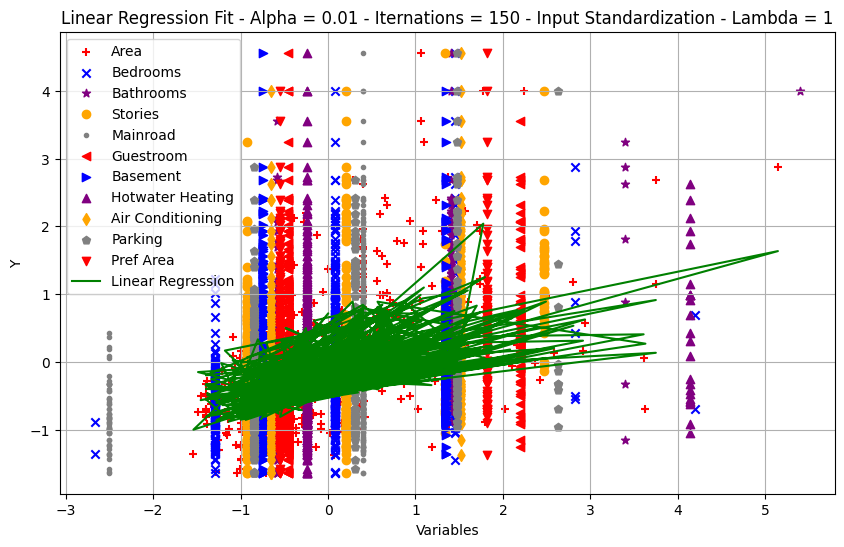

In [ ]:
# Scatter plot
#Area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking, prefarea
plt.scatter(xTrain[:,1], y_newTrain, color='red', marker='+', label='Area')
plt.scatter(xTrain[:,2], y_newTrain, color='blue', marker='x', label='Bedrooms')
plt.scatter(xTrain[:,3], y_newTrain, color='purple', marker='*', label='Bathrooms')
plt.scatter(xTrain[:,4], y_newTrain, color='orange', marker='o', label='Stories')
plt.scatter(xTrain[:,5], y_newTrain, color='gray', marker='.', label='Mainroad')
plt.scatter(xTrain[:,6], y_newTrain, color='red', marker='<', label='Guestroom')
plt.scatter(xTrain[:,7], y_newTrain, color='blue', marker='>', label='Basement')
plt.scatter(xTrain[:,8], y_newTrain, color='purple', marker='^', label='Hotwater Heating')
plt.scatter(xTrain[:,9], y_newTrain, color='orange', marker='d', label='Air Conditioning')
plt.scatter(xTrain[:,10], y_newTrain, color='gray', marker='p', label='Parking')
plt.scatter(xTrain[:,11], y_newTrain, color='red', marker='v', label='Pref Area')


# Line plot for the linear regression model
plt.plot(xTrain[:, 1], xTrain.dot(theta), color='green', label='Linear Regression')

# Plot customizations
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)
plt.xlabel('Variables')
plt.ylabel('Y')
plt.title('Linear Regression Fit - Alpha = 0.01 - Iternations = 150 - Input Standardization - Lambda = 1')
plt.legend()

# Show the plot
plt.show()

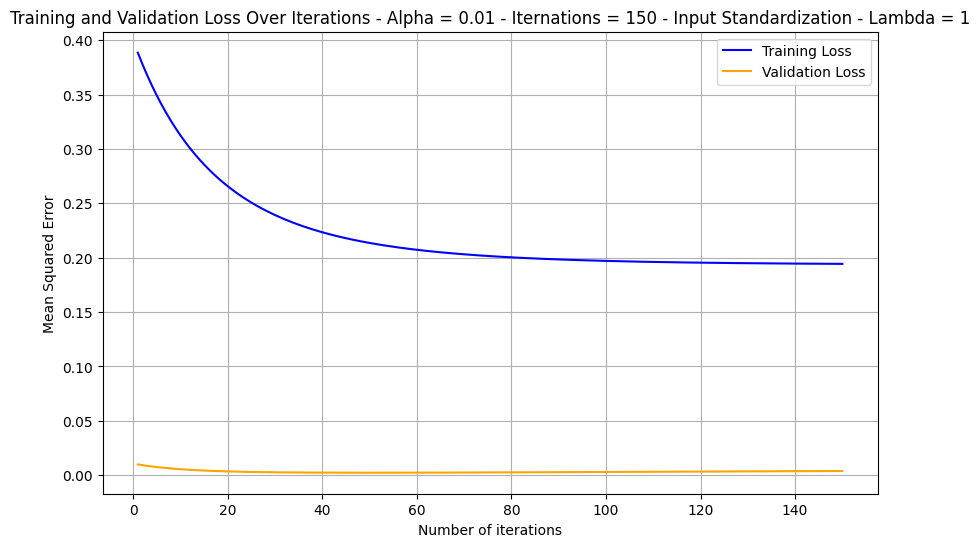

In [ ]:
plt.plot(range(1, iterations + 1), cost_history, color='blue', label= 'Training Loss')
plt.plot(range(1, iterations + 1), test_cost_history, color='orange', label= 'Validation Loss')
plt.legend()
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Mean Squared Error')
plt.title('Training and Validation Loss Over Iterations - Alpha = 0.01 - Iternations = 150 - Input Standardization - Lambda = 1')

# Show the plot
plt.show()